### Load Libraries & Set Current Working Directory

In [1]:
#import libraries for Toxic comment classification
import os
import numpy as np
import pandas as pd
import re
import string
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from matplotlib import pyplot
import seaborn as sns 
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

In [2]:
#set current working directory
os.chdir("C:/Users/BATMAN/Desktop/Data Science/PROJECTS/edWisor/Demo - Toxic Comment classification challenge")

### Load Data

In [3]:
#Load train and test data
train_df = pd.read_csv("C:/Users/BATMAN/Desktop/Data Science/PROJECTS/edWisor/Demo - Toxic Comment classification challenge - Attempt 1/train.csv")
test_df = pd.read_csv("C:/Users/BATMAN/Desktop/Data Science/PROJECTS/edWisor/Demo - Toxic Comment classification challenge - Attempt 1/test.csv")

### EDA (Exploratory Data Analysis)

In [4]:
#Checking NAN or missing values in train data
train_df['comment_text'].isnull().sum()

0

In [5]:
#Calculate total number of clean comments
comment_count =  train_df['comment_text'].count()
clean_count = 0
for i in range(len(train_df)):
    if(train_df['toxic'].iloc[i] + train_df['severe_toxic'].iloc[i] + train_df['obscene'].iloc[i] + train_df['threat'].iloc[i] + train_df['insult'].iloc[i] + train_df['identity_hate'].iloc[i] == 0):
        clean_count = clean_count+1

In [6]:
#Comments study
print ('Total no. of comments in test data : {} '.format(comment_count))
print ('Total no. of clean comments        : {} '.format(clean_count))
print ('Percentage of clean comments       : {} '.format((clean_count/comment_count)*100))
print ('Percentage of offensive comments   : {} '.format(((comment_count-clean_count)/comment_count)*100))
print ('Total number of NAN/Null comments  : {} '.format(train_df['comment_text'].isnull().sum()))

Total no. of comments in test data : 159571 
Total no. of clean comments        : 143346 
Percentage of clean comments       : 89.83211235124176 
Percentage of offensive comments   : 10.167887648758233 
Total number of NAN/Null comments  : 0 


In [7]:
#total number of comments in each category in train data
print ('Total no. of toxic comments in train data         : {} '.format(train_df['toxic'].sum()))
print ('Total no. of severe_toxic comments in train data  : {} '.format(train_df['severe_toxic'].sum()))
print ('Total no. of obscene comments in train data       : {} '.format(train_df['obscene'].sum()))
print ('Total no. of threat comments in train data        : {} '.format(train_df['threat'].sum()))
print ('Total no. of insult comments in train data        : {} '.format(train_df['insult'].sum()))
print ('Total no. of identity_hate comments in train data : {} '.format(train_df['identity_hate'].sum()))

Total no. of toxic comments in train data         : 15294 
Total no. of severe_toxic comments in train data  : 1595 
Total no. of obscene comments in train data       : 8449 
Total no. of threat comments in train data        : 478 
Total no. of insult comments in train data        : 7877 
Total no. of identity_hate comments in train data : 1405 


In [8]:
#Check datatypes of train_df
train_df.dtypes

id               object
comment_text     object
toxic             int64
severe_toxic      int64
obscene           int64
threat            int64
insult            int64
identity_hate     int64
dtype: object

In [9]:
#Calculating comment lenghts
sum_len_com = 0
for i in range(len(train_df)):
    sum_len_com = sum_len_com + len(train_df['comment_text'].iloc[i])
    
mean_comment_length = sum_len_com/(train_df['comment_text'].count())
    
comment_len = []
for i in range(len(train_df)):
    comment_len.append(len(train_df['comment_text'].iloc[i]))

# Average, min and max length of comments
print ('Mean length of comment : {} '.format(mean_comment_length))
print ('Min length of comment  : {} '.format(min(comment_len)))
print ('Max length of comment  : {} '.format(max(comment_len)))

Mean length of comment : 394.0732213246768 
Min length of comment  : 6 
Max length of comment  : 5000 


In [10]:
#calculating category wise comment lenght
toxic_com = []
severe_toxic_com = []
obscene_com = []
threat_com = []
insult_com = []
identity_hate_com = []
cat = [] 
cat_com_len = []

for i in range(len(train_df)):
    if(train_df['toxic'].iloc[i] == 1):
        toxic_com.append(train_df['comment_text'].iloc[i])
        cat.append('toxic')
        cat_com_len.append(len(train_df['comment_text'].iloc[i]))
    if(train_df['severe_toxic'].iloc[i] == 1):
        severe_toxic_com.append(train_df['comment_text'].iloc[i])
        cat.append('severe_toxic')
        cat_com_len.append(len(train_df['comment_text'].iloc[i]))
    if(train_df['obscene'].iloc[i] == 1):
        obscene_com.append(train_df['comment_text'].iloc[i])
        cat.append('obscene')
        cat_com_len.append(len(train_df['comment_text'].iloc[i]))
    if(train_df['threat'].iloc[i] == 1):
        threat_com.append(train_df['comment_text'].iloc[i])
        cat.append('threat')
        cat_com_len.append(len(train_df['comment_text'].iloc[i]))
    if(train_df['insult'].iloc[i] == 1):
        insult_com.append(train_df['comment_text'].iloc[i])
        cat.append('insult')
        cat_com_len.append(len(train_df['comment_text'].iloc[i]))
    if(train_df['identity_hate'].iloc[i] == 1):
        identity_hate_com.append(train_df['comment_text'].iloc[i])
        cat.append('identity_hate')
        cat_com_len.append(len(train_df['comment_text'].iloc[i]))

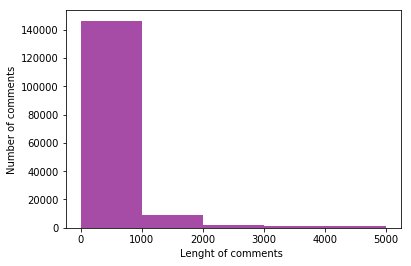

In [11]:
#Histogram to understand lenght distribution of comments
num_bins = 5
plt.xlabel('Lenght of comments ')
plt.ylabel('Number of comments')
plt.hist(comment_len, num_bins, facecolor='purple', alpha=0.7,)
plt.show()

In [12]:
toxic = train_df['toxic'].sum()
severe_toxic = train_df['severe_toxic'].sum()
obscene = train_df['obscene'].sum()
threat = train_df['threat'].sum()
insult = train_df['insult'].sum()
identity_hate = train_df['identity_hate'].sum()
comment_category = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate', 'comment_category']
Comment_category = pd.DataFrame(comment_category)

In [13]:
df_cat = pd.DataFrame(list(zip(cat,cat_com_len)))
df_cat.columns = ['comment category','comment lenght']

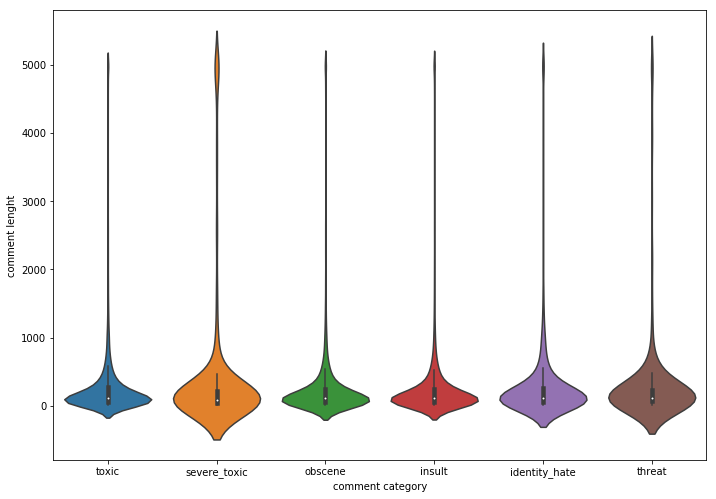

In [14]:
# Show comment category distribution violin plots
a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.violinplot(x= df_cat['comment category'], y= df_cat['comment lenght'], scale= 'width')

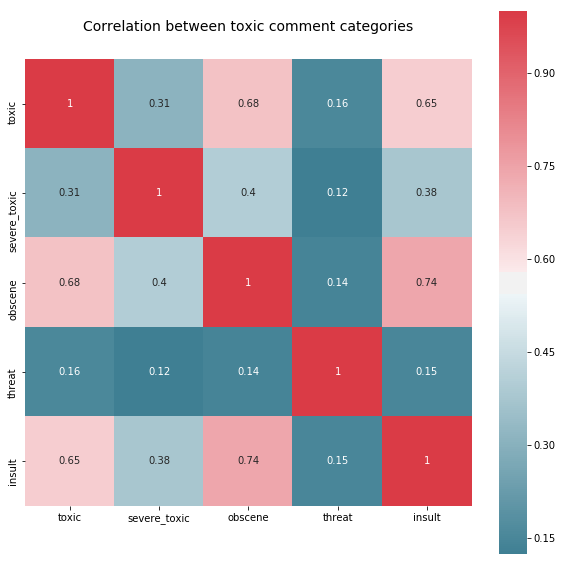

In [15]:
#Correlation analysis using heatmap
heat_df =  train_df.iloc[:,2:7]
f, ax = plt.subplots(figsize=(10,10))
plt.title('Correlation between toxic comment categories',size=14,y=1.05)
corr = heat_df.corr()

sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap= sns.diverging_palette(220,10, as_cmap = True), square=True,
            annot = True,ax=ax)

From the HeatMap we can see there is no highly positive or negative correlation between any two categories 

### Data Cleaning

In [16]:
#storing english stopwords in stop  variable
stop = set(stopwords.words('english'))
#defining function to clean the text comments
def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub('\W', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = re.sub('_', ' ',text)
    
    text = " ".join([i for i in text.split() if i not in stop])
    text = "".join(i for i in text if not i.isdigit())
    text = text.strip(' ')
    return text

In [17]:
#Cleaning the train and test text comments using clean_text function
train_corpus = [clean_text(train_df.iloc[i,1]) for i in range(0, train_df.shape[0])]
test_corpus = [clean_text(test_df.iloc[i,1]) for i in range(0, test_df.shape[0])]

In [18]:
#Storing the clean train and test corpus into dataframe
train_df['comment_text'] = pd.DataFrame(train_corpus)
test_df['comment_text'] = pd.DataFrame(test_corpus)

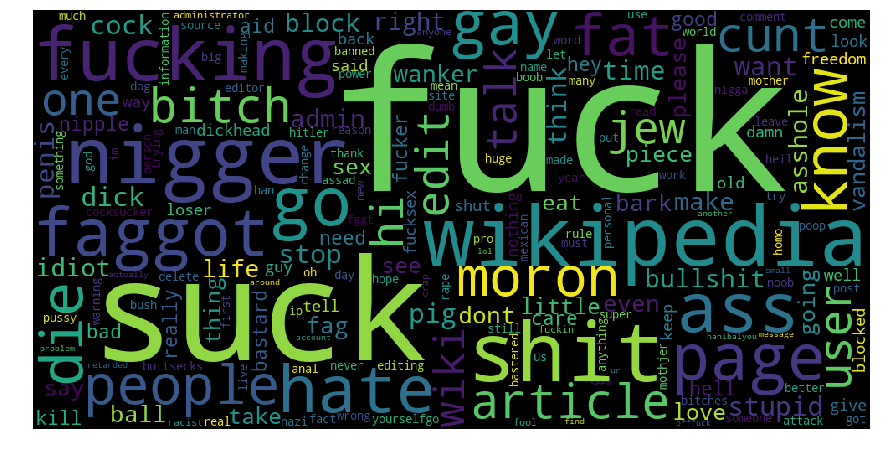

In [19]:
#Word cloud for toxic comment
w=[]
for i in range(len(train_df)):
    if train_df['toxic'].iloc[i] ==1:
        y = (train_df['comment_text'].iloc[i])
        w.append(y)
        
wordcloud = WordCloud(width = 1000, height = 500, stopwords=STOPWORDS, background_color='black',collocations=False).generate(' '.join(w))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

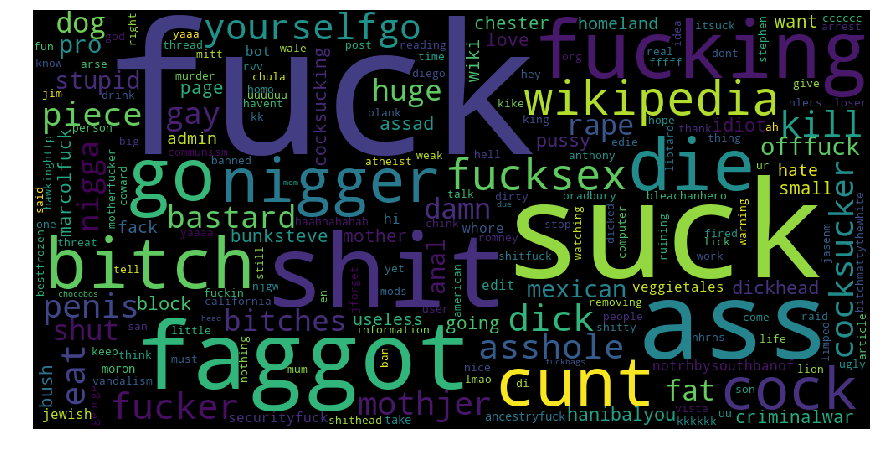

In [20]:
#Word cloud for severe_toxic comments
w=[]
for i in range(len(train_df)):
    if train_df['severe_toxic'].iloc[i] ==1:
        y = (train_df['comment_text'].iloc[i])
        w.append(y)
        
wordcloud = WordCloud(width = 1000, height = 500, stopwords=STOPWORDS, background_color='black',collocations=False).generate(' '.join(w))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

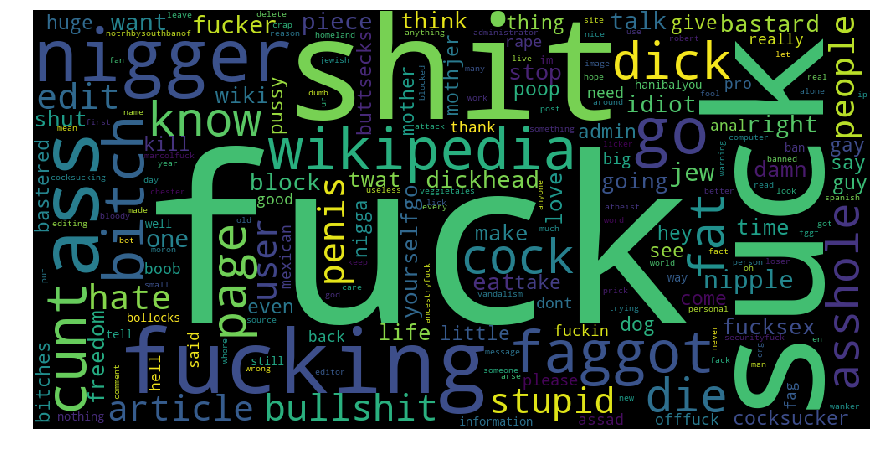

In [21]:
#Word cloud for obscene comments
w=[]
for i in range(len(train_df)):
    if train_df['obscene'].iloc[i] ==1:
        y = (train_df['comment_text'].iloc[i])
        w.append(y)
        
wordcloud = WordCloud(width = 1000, height = 500, stopwords=STOPWORDS, background_color='black',collocations=False).generate(' '.join(w))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

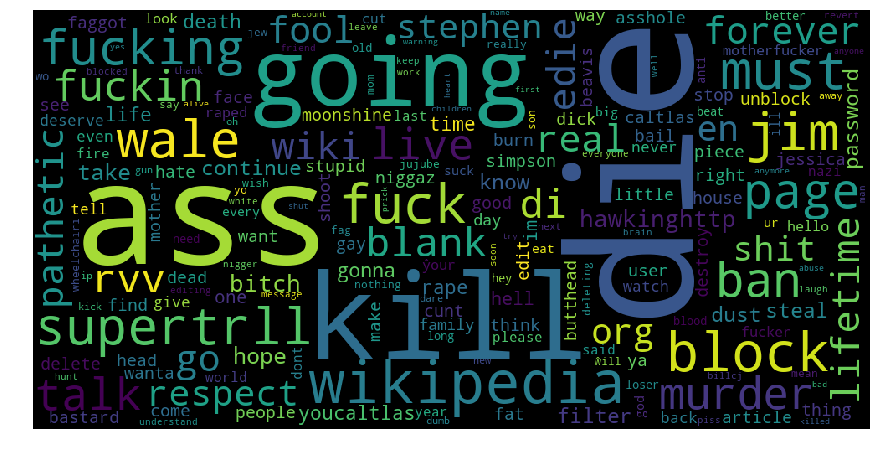

In [22]:
#Word cloud for threat comments
w=[]
for i in range(len(train_df)):
    if train_df['threat'].iloc[i] ==1:
        y = (train_df['comment_text'].iloc[i])
        w.append(y)
        
wordcloud = WordCloud(width = 1000, height = 500, stopwords=STOPWORDS, background_color='black',collocations=False).generate(' '.join(w))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

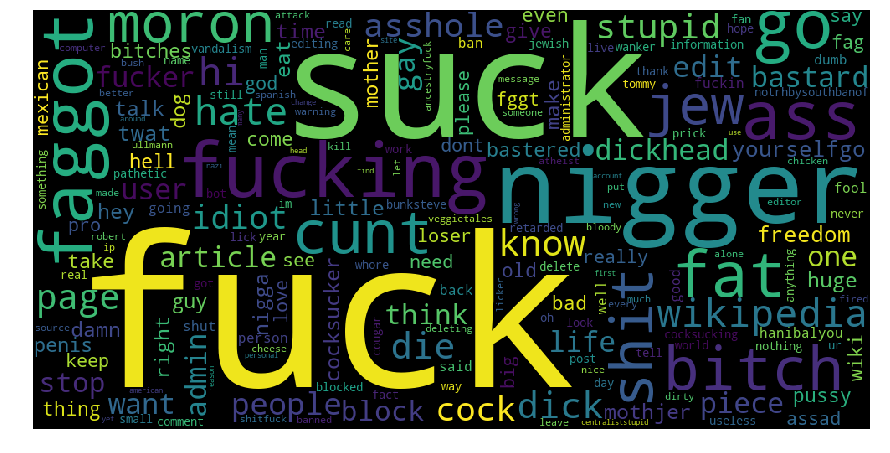

In [23]:
#Word cloud for insult comments
w=[]
for i in range(len(train_df)):
    if train_df['insult'].iloc[i] ==1:
        y = (train_df['comment_text'].iloc[i])
        w.append(y)
        
wordcloud = WordCloud(width = 1000, height = 500, stopwords=STOPWORDS, background_color='black',collocations=False).generate(' '.join(w))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

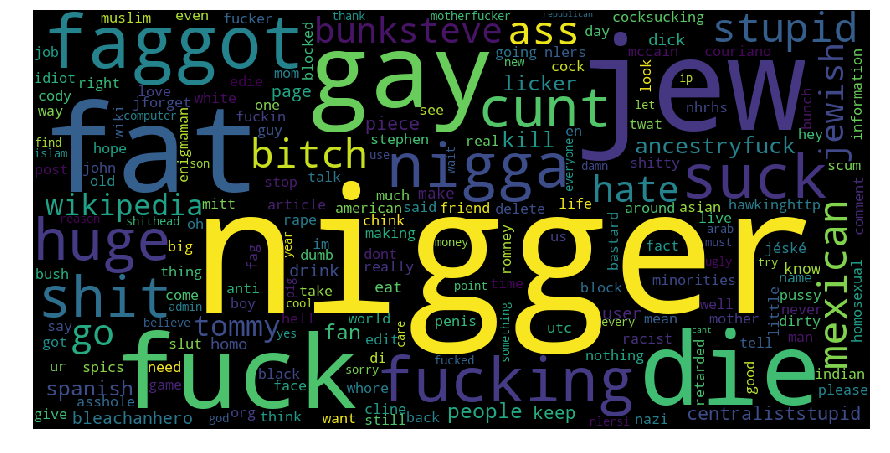

In [24]:
#Word cloud for identity_hate comments
w=[]
for i in range(len(train_df)):
    if train_df['identity_hate'].iloc[i] ==1:
        y = (train_df['comment_text'].iloc[i])
        w.append(y)
        
wordcloud = WordCloud(width = 1000, height = 500, stopwords=STOPWORDS, background_color='black',collocations=False).generate(' '.join(w))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [25]:
#get the comment text of train and test in seperate variables
train = train_df['comment_text']
test = test_df['comment_text']

In [26]:
# Instantiate TfidfVectorizer
vect = TfidfVectorizer(max_features=5000,stop_words='english')

In [27]:
#learn training data vocabulry and make a document-term-matrix
#transform the test data from the learned vocabulary and make a document-term-matx_rix
X_train_dtm = vect.fit_transform(train)
X_test_dtm = vect.transform(test)

### Apply Machine Learning Algorithm

In [30]:
# Apply Machine Learning Algorithm
cols_target = ['obscene','insult','toxic','severe_toxic','identity_hate','threat']
logreg = LogisticRegression(C=12.0)

#Load sample submission file
submission_binary = pd.read_csv('C:/Users/BATMAN/Desktop/Data Science/PROJECTS/edWisor/Demo - Toxic Comment classification challenge - Attempt 1/sample_submission.csv')

for i in cols_target:
    y = train_df[i]
    logreg.fit(X_train_dtm, y)# train the model using train_dtm & y
    train_predict = logreg.predict(X_train_dtm)#implement the model on train data for acuuracy
    print('Training accuracy is {} for {} '.format(accuracy_score(y, train_predict),i))#implement the model on train data for acuuracy
    test_predict_prob = logreg.predict_proba(X_test_dtm)[:,1]# compute the predicted probabilities for test_dtm
    submission_binary[i] = test_predict_prob

Training accuracy is 0.9835245752674359 for obscene 
Training accuracy is 0.9756346704601714 for insult 
Training accuracy is 0.9638217470593028 for toxic 
Training accuracy is 0.9919784923325667 for severe_toxic 
Training accuracy is 0.9939400016293688 for identity_hate 
Training accuracy is 0.998038490703198 for threat 


In [31]:
submission_binary.to_csv('Final_submission.csv', index=False)